# Multi-modal RAG with LangChain

## SetUp

Install the dependencies you need to run the notebook.

In [5]:
# for linux
!apt-get install poppler-utils tesseract-ocr libmagic-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following NEW packages will be installed:
  libmagic-dev poppler-utils
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 291 kB of archives.
After this operation, 1,086 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.9 [186 kB]
Fetched 291 kB in 1s (482 kB/s)
Selecting previously unselected package libmagic-dev:amd64.
(Reading database ... 126380 files and directories currently installed.)
Preparing to unpack .../libmagic-dev_1%3a5.41-3ubuntu0.1_amd64.deb ...
Unpacking libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Selecting previously unselected package poppler-utils.
Preparing to unpack .../poppler-u

In [3]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.9/527.9 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 5.0 MB/s eta 0:00:00
  

In [34]:
%pip install -U langchain-google-genai

  Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl.metadata (9.8 kB)
Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl (1.4 MB)


ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x78f987b3d750>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 126, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 99, in _retrieve_info
    info = _metadata.get_service_account_info(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 338, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 263, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http:/

  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15


ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x78f987b3d750>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 126, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 99, in _retrieve_info
    info = _metadata.get_service_account_info(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 338, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 263, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http:/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x78f987b3d750>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 126, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 99, in _retrieve_info
    info = _metadata.get_service_account_info(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 338, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 263, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http:/

In [3]:
import os

# keys for the services we will use

os.environ["GEMINI_API_KEY"] = "your-api-key"
os.environ["LANGCHAIN_API_KEY"] = "your-api-key"
os.environ["LANGCHAIN_TRACING_V2"] = "true"


## Extract the data

Extract the elements of the PDF that we will be able to use in the retrieval process. These elements can be: Text, Images, Tables, etc.

### Partition PDF tables, text, and images

In [4]:
from unstructured.partition.pdf import partition_pdf

output_path = "/content/"
file_path = output_path + 'oai_gpt-oss_model_card.pdf'

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [5]:
# We get types of elements from the partition_pdf function
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [6]:
len(chunks)

25

In [7]:
# Each CompositeElement containes a bunch of related elements.
# This makes it easy to use these elements together in a RAG pipeline.

chunks[0].metadata.orig_elements

In [8]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True

elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'c367cb76-54ff-4284-8dd7-d82a0c36ee4c',
 'text': 'Codeforces SWE-Bench Verified Tau-Bench Retail (Competition Code) (Software Engineering) (Function Calling) 2706 2719 69.1 68.1 70.4 67.8 2500 7522 2463 2516 62.4 60.7 576 Pos 2073 2230 — 60 = 60 - 54.8 2000 = 49.3 = > > 2 1500 8 40 8 40 1000 3 3 20 20 500 < < oO oO oO oy _ Sy XS re ae as? 4? ° a8 co a ed a8 ca 479% 99° FP PPMP PN LN ISD FO OPP 0 0? OF 0 0” OS POS we & 9 HF Co F C Kos',
 'metadata': {'detection_class_prob': 0.9181435704231262,
  'coordinates': {'points': ((np.float64(273.6121826171875),
     np.float64(195.79168701171875)),
    (np.float64(273.6121826171875), np.float64(539.4141235351562)),
    (np.float64(1395.3017578125), np.float64(539.4141235351562)),
    (np.float64(1395.3017578125), np.float64(195.79168701171875))),
   'system': 'PixelSpace',
   'layout_width': 1654,
   'layout_height': 2339},
  'last_modified': '2025-08-14T04:03:53',
  'filetype': 'PPM',
  'languages': ['eng'],
  

### Separate extracted elements into tables, text, and images

In [9]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [10]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

#### Check what the images look like

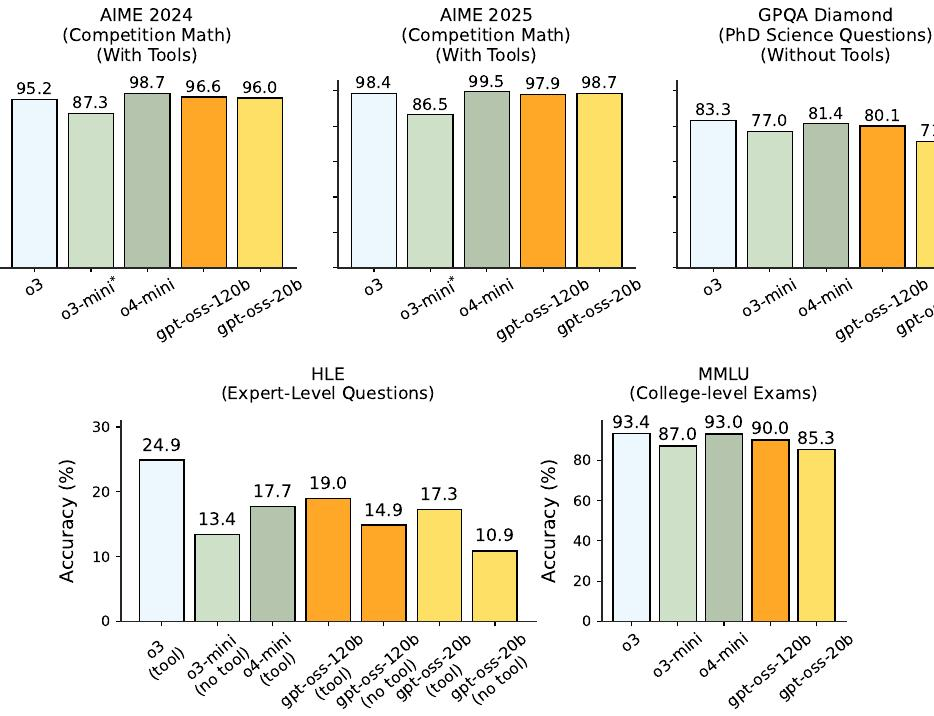

In [11]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

## Summarize the data

Create a summary of each element extracted from the PDF. This summary will be vectorized and used in the retrieval process.

### Text and Table summaries

We don't need a multimodal model to generate the summaries of the tables and the text. I will use GEMINI model for the same.

In [ ]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key:your-api-key")

In [13]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

In [14]:
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additional comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}
"""

prompt = ChatPromptTemplate.from_template(prompt_text)


In [15]:
# Replace with your Gemini API key
import os
os.environ["GOOGLE_API_KEY"] = "your-api-key"

model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.5
)


In [16]:
summarize_chain = (
    {"element": lambda x: x}
    | prompt
    | model
    | StrOutputParser()
)


In [17]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})


  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 10
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 20
}
].
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 10
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 18
}
].
  quota_metric: "generativelanguage.googleapis.com/generate_

In [18]:
text_summaries

["This document outlines the Model Card for OpenAI's gpt-oss-120b and gpt-oss-20b models, detailing their architecture, data, pretraining, and post-training methods for reasoning and tool use. It covers various evaluations including reasoning, factuality, health, and multilingual performance. Additionally, it addresses safety testing, mitigation approaches, and observed challenges such as disallowed content, jailbreaks, hallucinations, and fairness and bias.",
 'The document introduces gpt-oss-120b and gpt-oss-20b, open-weight reasoning models designed for agentic workflows, emphasizing safety and the unique risk profile of open-source models. It details a Preparedness Framework (Section 5) which includes Adversarial Training (5.1) and Capability Findings (5.2). Evaluations confirmed the default gpt-oss-120b model does not reach "High capability" in Biological/Chemical, Cyber, or AI Self-Improvement domains. Even after adversarial fine-tuning, the model did not achieve "High capability

### Image summaries

We will use gemini-2.0-flash to produce the image summaries.

In [19]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
import os

# Set API key
# os.environ["GOOGLE_API_KEY"] = "YOUR_API_KEY"

# Prompt template
prompt_template = """Describe the image in detail. For context,
the image is part of a research paper explaining the transformers architecture.
Be specific about graphs, such as bar plots."""

messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

# Model
model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",  # Free, fast model for image understanding
    temperature=0.5
)

# Chain
chain = prompt | model | StrOutputParser()

# Run batch inference
image_summaries = chain.batch(images)


  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 47
}
].
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 46
}
].
  quota_metric: "generativelanguage.googleapis.com/generate_

In [20]:
image_summaries

['The image is a figure containing five bar plots, each showing the accuracy (in percentage) of different models on different benchmarks. The models compared are "03", "03-mini*", "04-mini", "gpt-oss-120b", and "gpt-oss-20b". The benchmarks are "AIME 2024 (Competition Math) (With Tools)", "AIME 2025 (Competition Math) (With Tools)", "GPQA Diamond (PhD Science Questions) (Without Tools)", "HLE (Expert-Level Questions)", and "MMLU (College-level Exams)".\n\nThe first bar plot, titled "AIME 2024 (Competition Math) (With Tools)", shows the accuracy of the models on the AIME 2024 competition math benchmark, where the models are allowed to use tools. The accuracy values are as follows: "03" (95.2%), "03-mini*" (87.3%), "04-mini" (98.7%), "gpt-oss-120b" (96.6%), and "gpt-oss-20b" (96.0%).\n\nThe second bar plot, titled "AIME 2025 (Competition Math) (With Tools)", shows the accuracy of the models on the AIME 2025 competition math benchmark, where the models are allowed to use tools. The accura

In [21]:
print(image_summaries[1])

Here is a detailed description of the image:

The image consists of three bar plots arranged horizontally. Each plot represents the performance of different models on a specific task.

**Plot 1: Codeforces (Competition Code)**

*   **Title:** Codeforces (Competition Code)
*   **Y-axis:** Labeled "Elo". The scale ranges from 0 to 2500, with increments of 500.
*   **X-axis:** Represents different models. The models are:
    *   o3 (tool)
    *   o3-mini (no tool)
    *   o4-mini (tool)
    *   gpt-oss-120b (tool)
    *   gpt-oss-120b (no tool)
    *   gpt-oss-20b (tool)
    *   gpt-oss-20b (no tool)
*   **Bars:** Each model has a corresponding bar. The heights of the bars represent the Elo scores. The values are:
    *   o3 (tool): 2706
    *   o3-mini (no tool): 2073
    *   o4-mini (tool): 2719
    *   gpt-oss-120b (tool): 2622
    *   gpt-oss-120b (no tool): 2463
    *   gpt-oss-20b (tool): 2516
    *   gpt-oss-20b (no tool): 2230
*   **Bar colors:** The bars have different colors: li

## Load data and summaries to vectorstore

### Create the vectorstore

In [27]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "your-api-key"

import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# Hugging Face embedding model (free)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# The vectorstore to use to index the child chunks
vectorstore = Chroma(
    collection_name="multi_modal_rag",
    embedding_function=embeddings
)

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/tmp/ipython-input-2806768415.py:15: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


### Load the summaries and link the to the original data

In [30]:
# Add text chunks
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts_docs = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]})
    for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts_docs)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add table chunks only if summaries are non-empty
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables_docs = [
    Document(page_content=summary, metadata={id_key: table_ids[i]})
    for i, summary in enumerate(table_summaries)
    if summary and summary.strip()  # ✅ skip empty or None
]

if summary_tables_docs:  # ✅ only add if not empty
    retriever.vectorstore.add_documents(summary_tables_docs)
    retriever.docstore.mset(list(zip(table_ids, tables)))
else:
    print("⚠️ No valid table summaries to add.")

# Add image chunks
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img_docs = [
    Document(page_content=summary, metadata={id_key: img_ids[i]})
    for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img_docs)
retriever.docstore.mset(list(zip(img_ids, images)))

⚠️ No valid table summaries to add.


### Check retrieval

In [35]:
# Retrieve
docs = retriever.invoke(
    "what is oss model about?"
)

In [36]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

4.2 Jailbreaks

We further evaluate the robustness of gpt-oss-120b and gpt-oss-20b to jailbreaks: adversarial

prompts that purposely try to circumvent model refusals for content it’s not supposed to produce. We evaluate using the following approach:

• StrongReject [31]: inserts a known jailbreak into an example from the above safety refusal eval. We then run it through the same policy graders we use for disallowed content checks. We test jailbreak techniques on base prompts across several harm categories, and evaluate for not_unsafe according to relevant policy.

We find gpt-oss-120b and gpt-oss-20b generally perform similarly to OpenAI o4-mini.

Table 6: Jailbreak evaluations

Category gpt-oss-120b gpt-oss-20b OpenAI o4-mini illicit/non-violent-crime 0.979 0.960 0.980 prompts violence prompts 0.983 0.979 0.991 abuse/disinformation/hate 0.993 0.982 0.982 prompts sexual-content prompts 0.989 0.970 0.974

4.3 Instruction Hierarchy

Model inference providers can enable developers using 

## RAG pipeline

In [37]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from base64 import b64decode
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

# ---- 1. Make sure to set your Google API Key ----
# import os
# os.environ["GOOGLE_API_KEY"] = "YOUR_GOOGLE_API_KEY"

# ---- 2. Parse documents into images and text ----
def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)  # If it's valid base64, treat as image
            b64.append(doc)
        except Exception:
            text.append(doc)
    return {"images": b64, "texts": text}

# ---- 3. Build the chat prompt for Gemini ----
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )

# ---- 4. Create chain with Gemini (free model: gemini-1.5-flash) ----
gemini_chat = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # free & fast
    temperature=0,
)

chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | gemini_chat
    | StrOutputParser()
)

# ---- 5. Chain with sources ----
chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | gemini_chat
        | StrOutputParser()
    )
)


In [40]:
response = chain.invoke(
    "Summarize the models used in the paper. Explain in details what the model does."
)

print(response)

The provided context shows results from experiments using several large language models (LLMs) on different tasks, but it does not describe the models themselves in detail.  The charts show performance comparisons across various LLMs, including:

* **o3:** A large language model.  No further details are given.
* **o4-mini:** A large language model. No further details are given.
* **gpt-oss 20b launch candidate:** A 20-billion parameter version of the GPT-OSS model.  It's described as a "launch candidate," suggesting it's a pre-release version.
* **gpt-oss 120b launch candidate:** A 120-billion parameter version of the GPT-OSS model, also a pre-release version.

The experiments tested these models with and without browsing capabilities (indicated by "no browsing" or "browsing" in the chart labels).  Some experiments also used specific configurations like "helpful-only" or "cyber max," but the exact nature of these configurations is not explained.

The charts display the models' performa

Response: Based on the provided text, the models have several use cases:

* **Reasoning and factuality:**  The models are evaluated on benchmarks like AIME, GPQA, MMLU, and HLE, suggesting their use in tasks requiring reasoning and factual accuracy.

* **Coding:**  They are tested on Codeforces Elo and SWE-bench Verified, indicating their application in coding tasks, both with and without access to a terminal tool.

* **Tool use:**  Evaluated with τ-Bench Retail, demonstrating their ability to utilize various tools (browsing, Python, and arbitrary developer functions) to enhance their capabilities.

* **Additional capabilities:**  Benchmarks like MMMLU and HealthBench show their potential in multilingual tasks and health-related knowledge applications.

The models support three reasoning levels (low, medium, high), controllable via system prompts, and can be configured to use or not use various agentic tools, also via system prompts.


Context:
2.5.2 Variable Effort Reasoning Training


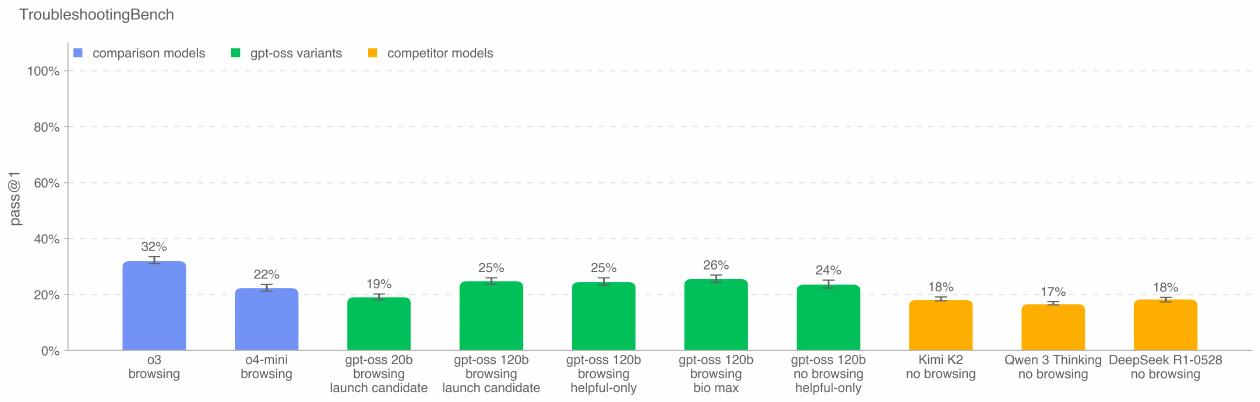

In [46]:
response = chain_with_sources.invoke(
    "-what are the use case of these models?"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

## References

- [LangChain Inspiration](https://github.com/langchain-ai/langchain/blob/master/cookbook/Semi_structured_and_multi_modal_RAG.ipynb?ref=blog.langchain.dev)
- [Multivector Storage](https://python.langchain.com/docs/how_to/multi_vector/)